## Music Recomender Machine Learning Model Using Decision Tree Algorithm

#### Import necesary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, pydotplus
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
from IPython.display import Image, display

In [2]:
# Loading the dataset.
df = pd.read_csv('C:/Users/peter/Data Science/Music Recomender Model using Decision Tree/music.csv')

#### Data audition - getting familiar with our dataset.

In [3]:
# print the first five rows of the dataset
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [4]:
# print the last five rows of the dataset
df.tail()

,age,gender,genre
13,27,0,Acoustic
14,30,0,Acoustic
15,31,0,Classical
16,34,0,Classical
17,35,0,Classical


In [5]:
# Number of rows and columns in the dataset
df.shape

(18, 3)

In [6]:
# the columns available in the dataset
df.columns

Index(['age', 'gender', 'genre'], dtype='object')

In [7]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


#### Data cleaning - Checking for missing data in our dataset

In [8]:
#checking for missing values in the dataset
df.isna()

,age,gender,genre
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [9]:
# Checking for total missing values in the dataset
df.isnull().sum().sum()

0

#### Descriptive analysis of the dataset

In [10]:
# Generating the descriptive analysis of the dataset.
df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


#### Splitting the dataset into input and output data

In [11]:
# Lets drop the output column
X = df.drop(columns = ['genre'])

In [12]:
#Let's look at our input.
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [13]:
# The output to be predicted.
y = df['genre']

In [14]:
# Printing the output column.
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

#### Encoding the genre column.

In [15]:
encoder = LabelEncoder()
df['genre']=encoder.fit_transform(df['genre'])

In [16]:
# Let's check if encoded
df.head()

,age,gender,genre
0,20,1,3
1,23,1,3
2,25,1,3
3,26,1,4
4,29,1,4


In [17]:
# Let's in the entire dataset
df

,age,gender,genre
0,20,1,3
1,23,1,3
2,25,1,3
3,26,1,4
4,29,1,4
5,30,1,4
6,31,1,1
7,33,1,1
8,37,1,1
9,20,0,2


In [18]:
# The output to be predicted.
y = df['genre']
y

0     3
1     3
2     3
3     4
4     4
5     4
6     1
7     1
8     1
9     2
10    2
11    2
12    0
13    0
14    0
15    1
16    1
17    1
Name: genre, dtype: int32

#### Training of our model

In [19]:
model = DecisionTreeClassifier()
model.fit(X,y)
prediction = model.predict([[26,1], [22,0]])
prediction

array([4, 2])

#### Calculating the model accuracy.

In [20]:
# We need to separate the data in training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

score = accuracy_score(y_test, prediction)
score

1.0

#### Model persistence

In [21]:
# We save our already trained model to avoid retraining
joblib.dump(model, 'music_recommender.joblib')

['music_recommender.joblib']

In [22]:
# Now lets load the already trained model in our new joblib file.
model = joblib.load('music_recommender.joblib')
prediction = model.predict([[21,1]])
prediction

array([3])

#### Graphical view of the tree.

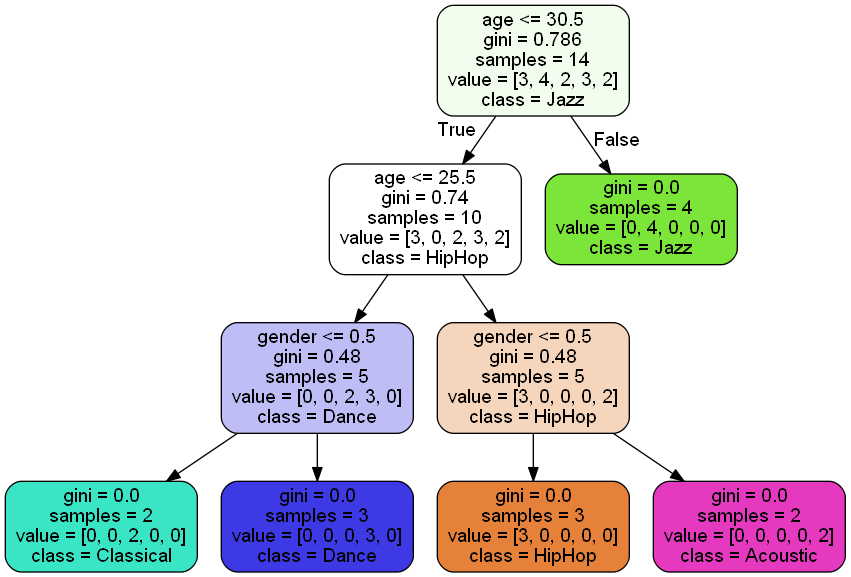

In [23]:
data_tree = tree.export_graphviz(model, out_file = None,filled = True, rounded = True,
                                feature_names = ['age', 'gender'],
                                class_names = ['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic', 'Classical'])
graph = pydotplus.graph_from_dot_data(data_tree)
display(Image(graph.create_png()))

# THE END!!! Thank you!!!

### NAME:Mukavane Peter.EMAIL:petermukavane@gmail.com. CONTACT: +254702856503.